# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated python package called citipy. citipy is used to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
#Latitude and longitude values are traditionally measured either in decimal degrees or in degrees, minutes, and seconds (DMS)
#Latitude values are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole.
#Longitude values are measured relative to the prime meridian.They range from -180° when traveling west to 180° when traveling east
lat_lngs = []
cities = []

# Create a set of random but unique set of  lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city= citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #print(city)
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
            

# Print the city count to confirm sufficient count
len(cities)
            

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={your api key}
api_key = api_keys.api_key

url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+api_key

city_data=[]

In [17]:
#Set counter 
record_count=0
set_count=1

print("Beginning Data Retrieval     ")
print("-----------------------------")

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count =0
        
        
    record_count +=1
        
    city_url = url + "&q=" + city
                

        
    print(f"Processing Record: {record_count} of Set: {set_count} of | {city.capitalize()}")
    print(city_url)
    
    


    try:
        
        city_url = url + "&q=" + city

        weather_data= requests.get(city_url).json()

        lng= weather_data['coord']['lon']
        lat= weather_data['coord']['lat']
        temp = weather_data['main']['temp']
        country= weather_data['sys']['country']
        max_temp = weather_data["main"]["temp_max"]
        humidity = weather_data["main"]["humidity"]
        clouds = weather_data["clouds"]["all"]
        wind_speed = weather_data['wind']['speed']
        date = weather_data['dt']
    
    
        city_data.append({
                      'City' : city,
                      'Temperature' : temp,
                     'Longitude':lng,
                     'Latitude': lat,
                     'Country' : country,
                     'Max Temperature': max_temp,
                     'Humidity': humidity,
                     'Clouds' : clouds,
                     'Wind Speed': wind_speed,
                     'Date': date
                         })
    except:
        print("City not found skipping.......")

Beginning Data Retrieval     
-----------------------------
Processing Record: 1 of Set: 1 of | Suchil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=suchil
Processing Record: 2 of Set: 1 of | Conakry
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=conakry
Processing Record: 3 of Set: 1 of | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=ushuaia
Processing Record: 4 of Set: 1 of | Kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=kirakira
Processing Record: 5 of Set: 1 of | East london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=east london
Processing Record: 6 of Set: 1 of | Warrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=warring

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=szubin
Processing Record: 3 of Set: 2 of | Ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=ponta do sol
Processing Record: 4 of Set: 2 of | Roura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=roura
Processing Record: 5 of Set: 2 of | Kozhva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=kozhva
Processing Record: 6 of Set: 2 of | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=victoria
Processing Record: 7 of Set: 2 of | San patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=san patricio
Processing Record: 8 of Set: 2 of | Labytnangi
http://api.openweathermap.org/data/2.5/weather?units

Processing Record: 3 of Set: 3 of | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=vaini
Processing Record: 4 of Set: 3 of | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=tasiilaq
Processing Record: 5 of Set: 3 of | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=bredasdorp
Processing Record: 6 of Set: 3 of | Attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=attawapiskat
City not found skipping.......
Processing Record: 7 of Set: 3 of | Nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=nizhneyansk
City not found skipping.......
Processing Record: 8 of Set: 3 of | Narasannapeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634

Processing Record: 6 of Set: 4 of | New norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=new norfolk
Processing Record: 7 of Set: 4 of | Simpang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=simpang
Processing Record: 8 of Set: 4 of | Rimbey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=rimbey
Processing Record: 9 of Set: 4 of | Nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=nemuro
Processing Record: 10 of Set: 4 of | Jambi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=jambi
Processing Record: 11 of Set: 4 of | Port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=port elizabeth
Processing Record: 12 of Set: 4 of | Bubaque
http://ap

Processing Record: 8 of Set: 5 of | Ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=ketchikan
Processing Record: 9 of Set: 5 of | College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=college
Processing Record: 10 of Set: 5 of | Canutama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=canutama
Processing Record: 11 of Set: 5 of | Nhulunbuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=nhulunbuy
Processing Record: 12 of Set: 5 of | Tenno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=tenno
Processing Record: 13 of Set: 5 of | Wuda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=wuda
Processing Record: 14 of Set: 5 of | Takoradi
http://api.openweath

Processing Record: 13 of Set: 6 of | Cockburn town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=cockburn town
Processing Record: 14 of Set: 6 of | Churapcha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=churapcha
Processing Record: 15 of Set: 6 of | Masuguru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=masuguru
Processing Record: 16 of Set: 6 of | Allanmyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=allanmyo
City not found skipping.......
Processing Record: 17 of Set: 6 of | Santa cruz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=santa cruz
Processing Record: 18 of Set: 6 of | Abha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=abha
Processing Re

Processing Record: 18 of Set: 7 of | Samarinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=samarinda
Processing Record: 19 of Set: 7 of | Shirgaon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=shirgaon
Processing Record: 20 of Set: 7 of | Ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=ambon
Processing Record: 21 of Set: 7 of | Ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=ilulissat
Processing Record: 22 of Set: 7 of | Dibaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=dibaya
City not found skipping.......
Processing Record: 23 of Set: 7 of | Paarl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=paarl
Processing Record: 24 of Set: 7 o

City not found skipping.......
Processing Record: 22 of Set: 8 of | Antalaha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=antalaha
Processing Record: 23 of Set: 8 of | Tirlyanskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=tirlyanskiy
Processing Record: 24 of Set: 8 of | Aquiraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=aquiraz
Processing Record: 25 of Set: 8 of | San carlos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=san carlos
Processing Record: 26 of Set: 8 of | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=pangnirtung
Processing Record: 27 of Set: 8 of | Kattivakkam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=kattivakkam
P

Processing Record: 26 of Set: 9 of | Plettenberg bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=plettenberg bay
Processing Record: 27 of Set: 9 of | Pemangkat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=pemangkat
Processing Record: 28 of Set: 9 of | Kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=kutum
Processing Record: 29 of Set: 9 of | Reading
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=reading
Processing Record: 30 of Set: 9 of | Balad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=balad
Processing Record: 31 of Set: 9 of | Mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=mehamn
Processing Record: 32 of Set: 9 of | Semey
http://api.

Processing Record: 31 of Set: 10 of | Kamina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=kamina
Processing Record: 32 of Set: 10 of | Botwood
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=botwood
Processing Record: 33 of Set: 10 of | Guiong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=guiong
Processing Record: 34 of Set: 10 of | Renqiu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=renqiu
Processing Record: 35 of Set: 10 of | Nyurba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=nyurba
Processing Record: 36 of Set: 10 of | Mountain home
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=mountain home
Processing Record: 37 of Set: 10 of | Jumla
http://api

Processing Record: 32 of Set: 11 of | Banmo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=banmo
City not found skipping.......
Processing Record: 33 of Set: 11 of | Angoche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=angoche
Processing Record: 34 of Set: 11 of | Kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=kieta
Processing Record: 35 of Set: 11 of | Emborion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=emborion
Processing Record: 36 of Set: 11 of | Bejar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=bejar
Processing Record: 37 of Set: 11 of | Mathbaria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=mathbaria
Processing Record: 38 of Set: 11 

Processing Record: 36 of Set: 12 of | Vankleek hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=vankleek hill
Processing Record: 37 of Set: 12 of | Thunder bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=thunder bay
Processing Record: 38 of Set: 12 of | Tobol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=tobol
Processing Record: 39 of Set: 12 of | Troitskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=troitskoye
Processing Record: 40 of Set: 12 of | Lucapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=lucapa
Processing Record: 41 of Set: 12 of | Severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c373d7f6fe670e27ea08634a1f1c8331&q=severo-kurilsk
Processing Record: 42 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
cityData = pd.DataFrame(city_data)
cityData.head(10)

,City,Clouds,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Temperature,Wind Speed
0,suchil,21,MX,1591217193,17,23.63,-103.92,85.73,85.73,15.23
1,conakry,85,GN,1591217088,80,9.54,-13.68,82.53,82.53,6.35
2,ushuaia,75,AR,1591217011,75,-54.80,-68.30,44.60,44.60,17.22
3,kirakira,97,SB,1591217193,74,-10.45,161.92,82.51,82.51,4.59
4,east london,100,ZA,1591217093,78,-33.02,27.91,65.39,65.39,6.89
5,warrington,91,GB,1591217002,71,53.39,-2.58,55.00,52.84,4.70
6,shido,75,JP,1591217194,88,34.32,134.17,66.20,65.05,4.70
7,carayao,29,PY,1591217194,71,-25.18,-56.40,66.96,66.96,1.97
8,kaili,56,ID,1591217194,89,-3.46,120.21,68.18,68.18,1.86
9,avarua,14,CK,1591217194,78,-21.21,-159.78,77.00,77.00,13.87


In [19]:
# Export the City_Data into a csv
cityData.to_csv(output_data_file,index_label='City_ID' )

#cityData.count

In [20]:
#Retrieve only the relevant columns for visualizations
lat= cityData['Latitude']
lng = cityData['Longitude']
humidity= cityData['Humidity']
clouds = cityData['Clouds']
max_temp = cityData['Max Temperature']
wind_speed =cityData['Wind Speed']


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

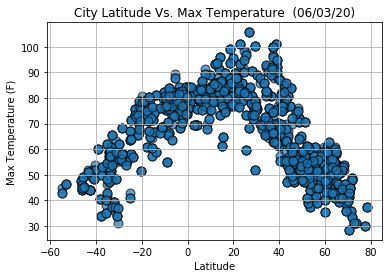

In [21]:

plt.scatter(lat, max_temp, edgecolors='black', alpha=0.7, marker='o', label='Cities',s=80)
plt.title(f"City Latitude Vs. Max Temperature  ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

plt.savefig("../Images/Fig1.png")

plt.show()


#### Latitude vs. Humidity Plot

plt.scatter(lat, humidity, edgecolors='black', alpha=0.7, marker='o', label='Cities',s=80)
plt.title(f"City Latitude Vs. Humidity ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

plt.savefig("../Images/Fig2.png")

plt.show()

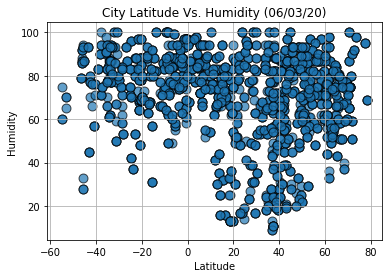

In [27]:
plt.scatter(lat, humidity, edgecolors='black', alpha=0.7, marker='o', label='Cities',s=80)
plt.title(f"City Latitude Vs. Humidity ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

plt.savefig("../Images/Fig2.png")

plt.show()

#### Latitude vs. Cloudiness Plot

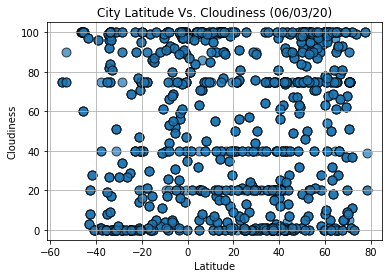

In [28]:
plt.scatter(lat, clouds, edgecolors='black', alpha=0.7, marker='o', label='Cities',s=80)
plt.title(f"City Latitude Vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

plt.savefig("../Images/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

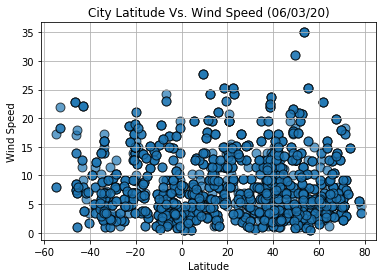

In [29]:
plt.scatter(lat, wind_speed, edgecolors='black', alpha=0.7, marker='o', label='Cities',s=80)
plt.title(f"City Latitude Vs. Wind Speed ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

plt.savefig("../Images/Fig4.png")

plt.show()